### TensorFlow Basic Syntax



In [64]:
import tensorflow as tf
import numpy as np

In [5]:
print(tf.__version__)

1.15.3


In [6]:
hello = tf.constant('Hello')

In [7]:
world = tf.constant('World')

In [8]:
type(hello) # Tensor object

tensorflow.python.framework.ops.Tensor

In [9]:
print(hello)

Tensor("Const:0", shape=(), dtype=string)


In [10]:
with tf.Session() as sess:
    result = sess.run(hello+world)

In [11]:
result

b'HelloWorld'

In [12]:
a = tf.constant(10)
b = tf.constant(59)

In [13]:
with tf.Session() as sess:
    result = sess.run(a+b)

In [14]:
result

69

In [15]:
const = tf.constant(10)

In [16]:
fill_mat = tf.fill((4,4), 10) #creates a 1D array

In [17]:
myzeros = tf.zeros((4,4))
myone = tf.ones((4,4))

In [18]:
myrandn = tf.random_normal((4,4),mean=0,stddev=1.0)

In [19]:
myrandu = tf.random_uniform((4,4),minval=0,maxval=1)

In [20]:
my_ops = [const,fill_mat,myzeros,myone,myrandn,myrandu]

In [21]:
sess = tf.InteractiveSession()

In [22]:
for op in my_ops:
    print(sess.run(op))

10
[[10 10 10 10]
 [10 10 10 10]
 [10 10 10 10]
 [10 10 10 10]]
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
[[1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]]
[[ 1.4125061  -0.26728138 -1.8595104  -0.8036846 ]
 [ 0.31781816 -2.3463967  -2.5462158  -0.4831428 ]
 [ 1.7754815  -1.5174662   1.7594349   0.08653322]
 [-0.2235305   1.0021033  -0.07119232 -0.81697077]]
[[0.9703989  0.8110949  0.73184896 0.4444002 ]
 [0.60404813 0.58044016 0.12751889 0.36843717]
 [0.61545444 0.29308164 0.13042545 0.0298413 ]
 [0.852491   0.03759336 0.8161776  0.7331548 ]]


In [23]:
a = tf.constant([[1,2],[3,4]])
a.get_shape()

TensorShape([Dimension(2), Dimension(2)])

In [24]:
b = tf.constant([[10],[100]])

In [25]:
b.get_shape()

TensorShape([Dimension(2), Dimension(1)])

In [26]:
result = tf.matmul(a,b)

In [27]:
sess.run(result)

array([[210],
       [430]], dtype=int32)

In [28]:
result.eval()

array([[210],
       [430]], dtype=int32)

In [29]:
#TensorFlow Graphs

In [30]:
'''
Graphs are sets of connected nodes
Connections are referred to as edges
Each Node is an operation with possible inputs that can supply some output

'''

'\nGraphs are sets of connected nodes\nConnections are referred to as edges\nEach Node is an operation with possible inputs that can supply some output\n\n'

In [31]:
n1 = tf.constant(1)
n2 = tf.constant(2)

In [32]:
n3 = n1+n2

In [33]:
with tf.Session() as sess:
    result = sess.run(n3)

In [34]:
print(result)

3


In [35]:
tf.get_default_graph()

In [36]:
g = tf.Graph()

In [37]:
print(g)

In [38]:
graph_one = tf.get_default_graph()

In [39]:
graph_two = tf.Graph()

In [40]:
graph_one
graph_two

In [41]:
with graph_two.as_default():
    print(graph_two is tf.get_default_graph())

True


In [42]:
print(graph_two is tf.get_default_graph())

False


In [43]:
# Variables and Placeholders
'''
2 types of tensor objects - Variables and placeholders

a) Variables - Hold Values of weights and biases throughout the session
b) Variables need to be initialised

Placeholders are initally empty and are used to feed in actual training examples. They do need a declared expected data type with an optional shape arguement
'''

'\n2 types of tensor objects - Variables and placeholders\n\na) Variables - Hold Values of weights and biases throughout the session\nb) Variables need to be initialised\n\nPlaceholders are initally empty and are used to feed in actual training examples. They do need a declared expected data type with an optional shape arguement\n'

In [44]:
sess = tf.InteractiveSession()


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/tensorflow_core/python/client/session.py:1750: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


In [45]:
my_tensor = tf.random_uniform((4,4),0,1)

In [46]:
my_tensor

<tf.Tensor 'random_uniform_1:0' shape=(4, 4) dtype=float32>

In [47]:
my_var = tf.Variable(initial_value=my_tensor)

In [48]:
print(my_var)

<tf.Variable 'Variable:0' shape=(4, 4) dtype=float32_ref>


In [49]:
init = tf.global_variables_initializer()

In [50]:
sess.run(init)

In [51]:
sess.run(my_var)

array([[0.8707614 , 0.88921046, 0.40426314, 0.86732113],
       [0.76479566, 0.15010571, 0.49343193, 0.89852583],
       [0.41655838, 0.0616976 , 0.18820775, 0.95957744],
       [0.7534468 , 0.8556911 , 0.91271925, 0.88824916]], dtype=float32)

In [52]:
ph = tf.placeholder(tf.float32,shape=(None,5))

## Example Neural Network

In [53]:
n_features = 10 
n_dense_neurons = 3

In [54]:
x = tf.placeholder(tf.float32,(None,n_features))

In [56]:
W = tf.Variable(tf.random_normal([n_features,n_dense_neurons]))
b = tf.Variable(tf.ones(n_dense_neurons))

In [57]:
xW = tf.matmul(x,W)

In [58]:
z = tf.add(xW, b)

In [59]:
a = tf.sigmoid(z) #activation function

In [62]:
init = tf.global_variables_initializer()

In [65]:
with tf.Session() as sess:
    sess.run(init)
    layer_out = sess.run(a,feed_dict={x:np.random.random([1,n_features])})

In [66]:
print(layer_out)

[[0.7279785  0.91924226 0.63654774]]


## Simple Regression Example

In [68]:
x_data = np.linspace(0,10,10) + np.random.uniform(-1.5,1.5,10)


In [69]:
x_data

array([-0.41225363,  2.18037181,  1.86906151,  2.9998485 ,  5.22875034,
        4.61547699,  6.88344193,  8.21616516,  9.88710577,  9.32209879])

In [70]:
y_label = np.linspace(0,10,10) + np.random.uniform(-1.5,1.5,10)

In [71]:
y_label

array([-0.51228251,  2.28070068,  0.74689289,  2.0104067 ,  5.50249946,
        5.75600942,  7.7162457 ,  8.84715234, 10.2435197 ,  9.75586108])

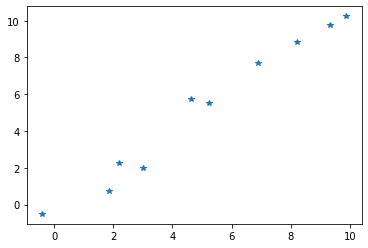

In [74]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(x_data,y_label, '*')

In [77]:
# y = mx+c
np.random.rand(2)
m = tf.Variable(0.14)
b = tf.Variable(0.27)


In [78]:
error = 0

for x, y in zip(x_data,y_label):
    y_hat = m * x + b
    error += (y-y_hat)**2

In [79]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001)
train = optimizer.minimize(error)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [80]:
init = tf.global_variables_initializer()

In [85]:
with tf.Session() as sess:
    sess.run(init)
    training_steps = 100 
    for i in range(training_steps):
        sess.run(train)
    final_slope,final_intercept = sess.run([m,b])

In [86]:
x_test = np.linspace(-1,11,10)
y_pred_plot = final_slope * x_test + final_intercept

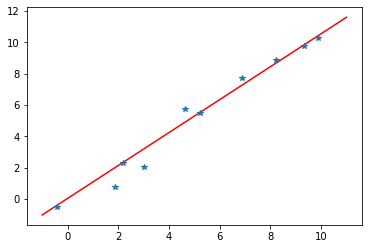

In [87]:
plt.plot(x_test,y_pred_plot,'r')
plt.plot(x_data,y_label, '*')